<a href="https://colab.research.google.com/github/amppppppp/data_sci_CU_2022/blob/main/Assignment4_panuwat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
 !pip install --upgrade scikit-learn==1.0.2
!pip install --upgrade numpy==1.21.5
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
!wget https://raw.githubusercontent.com/kaopanboonyuen/Python-Data-Science/master/Dataset/hed2020_dataset.csv


--2022-09-10 15:43:53--  https://raw.githubusercontent.com/kaopanboonyuen/Python-Data-Science/master/Dataset/hed2020_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 352588 (344K) [text/plain]
Saving to: ‘hed2020_dataset.csv.1’

hed2020_dataset.csv 100%[===================>] 344.32K  --.-KB/s    in 0.006s  

2022-09-10 15:43:53 (55.9 MB/s) - ‘hed2020_dataset.csv.1’ saved [352588/352588]



# 1. Read data

In [43]:
df=pd.read_csv("hed2020_dataset.csv")

In [44]:
df.head()

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,...,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,...,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5824 non-null   int64  
 1   label                        5764 non-null   object 
 2   cap-shape                    5824 non-null   object 
 3   cap-surface                  5797 non-null   object 
 4   bruises                      5725 non-null   object 
 5   odor                         5725 non-null   object 
 6   gill-attachment              5725 non-null   object 
 7   gill-spacing                 5694 non-null   object 
 8   gill-size                    5703 non-null   object 
 9   stalk-shape                  5703 non-null   object 
 10  stalk-root                   5793 non-null   object 
 11  stalk-surface-above-ring     5793 non-null   object 
 12  stalk-surface-below-ring     5793 non-null   object 
 13  veil-type         

In [46]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts)) #check null values
df.shape

Number of null values in each column:
id                               0
label                           60
cap-shape                        0
cap-surface                     27
bruises                         99
odor                            99
gill-attachment                 99
gill-spacing                   130
gill-size                      121
stalk-shape                    121
stalk-root                      31
stalk-surface-above-ring        31
stalk-surface-below-ring        31
veil-type                       62
ring-number                     62
ring-type                       62
spore-print-color               56
population                      56
habitat                         31
cap-color-rate                  27
gill-color-rate                121
veil-color-rate                 62
stalk-color-above-ring-rate     31
stalk-color-below-ring-rate     62
dtype: int64


(5824, 24)


# 2. Drop rows where the target (label) variable is missing.

In [47]:
df.dropna(subset=['label'],axis = 0,inplace= True)

In [48]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts)) #check null values
df.shape

Number of null values in each column:
id                               0
label                            0
cap-shape                        0
cap-surface                     27
bruises                         99
odor                            99
gill-attachment                 99
gill-spacing                   130
gill-size                      121
stalk-shape                    121
stalk-root                      31
stalk-surface-above-ring        31
stalk-surface-below-ring        31
veil-type                       62
ring-number                     62
ring-type                       62
spore-print-color               56
population                      56
habitat                         31
cap-color-rate                  27
gill-color-rate                121
veil-color-rate                 62
stalk-color-above-ring-rate     31
stalk-color-below-ring-rate     62
dtype: int64


(5764, 24)

# 3.  select only edible mushroom

In [49]:
df_C=df.loc[df['label']=='e']
df_C.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 1 to 5823
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2104 non-null   int64  
 1   label                        2104 non-null   object 
 2   cap-shape                    2104 non-null   object 
 3   cap-surface                  2098 non-null   object 
 4   bruises                      2077 non-null   object 
 5   odor                         2077 non-null   object 
 6   gill-attachment              2077 non-null   object 
 7   gill-spacing                 2049 non-null   object 
 8   gill-size                    2055 non-null   object 
 9   stalk-shape                  2055 non-null   object 
 10  stalk-root                   2076 non-null   object 
 11  stalk-surface-above-ring     2076 non-null   object 
 12  stalk-surface-below-ring     2076 non-null   object 
 13  veil-type         

In [50]:

df_C1=df_C.pop('cap-color-rate')

df_C2=df_C.pop('stalk-color-above-ring-rate')
df_cn=pd.concat([df_C1,df_C2],axis=1,names=['cap-color-rate','stalk-color-above-ring-rate'])
df_cn

,cap-color-rate,stalk-color-above-ring-rate
1,2.0,1.0
2,3.0,1.0
4,4.0,1.0
5,2.0,1.0
6,3.0,1.0
...,...,...
5815,1.0,7.0
5819,1.0,7.0
5820,1.0,7.0
5821,1.0,7.0


In [51]:
df_cn.mode()

,cap-color-rate,stalk-color-above-ring-rate
0,1.0,1.0


In [52]:
null_counts = df_cn.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts)) #check null values
df_cn.shape
#fill_value=df_cn.mode().iloc[0] #cal mode value
fill_value=df_cn.mean() #cal mean value
print(fill_value)
df_cn.fillna(value=fill_value,inplace= True)
df_cn.isnull().sum()

Number of null values in each column:
cap-color-rate                  6
stalk-color-above-ring-rate    28
dtype: int64
cap-color-rate                 3.467588
stalk-color-above-ring-rate    2.410405
dtype: float64


cap-color-rate                 0
stalk-color-above-ring-rate    0
dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cn)

trans_data = scaler.transform(df_cn)
print(trans_data)

org_data = scaler.inverse_transform(trans_data)
print(org_data)

[[-0.73500484 -0.74760802]
 [-0.23417985 -0.74760802]
 [ 0.26664515 -0.74760802]
 ...
 [-1.23582983  2.43279003]
 [-1.23582983  2.43279003]
 [-1.23582983  2.43279003]]
[[2. 1.]
 [3. 1.]
 [4. 1.]
 ...
 [1. 7.]
 [1. 7.]
 [1. 7.]]


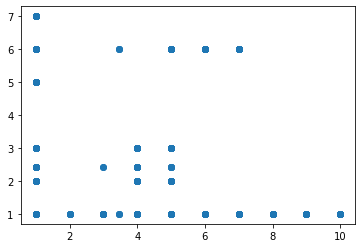

In [54]:
plt.scatter(df_cn['cap-color-rate'],df_cn['stalk-color-above-ring-rate'],cmap='rainbow')
#plt.scatter(df_cn[0],df_cn[1],cmap='rainbow')

In [55]:
df_cn.value_counts()

cap-color-rate  stalk-color-above-ring-rate
4.000000        1.000000                       299
1.000000        7.000000                       192
                1.000000                       186
5.000000        1.000000                       169
3.000000        1.000000                       168
5.000000        2.000000                       157
                3.000000                       151
4.000000        2.000000                       141
                3.000000                       135
1.000000        3.000000                       123
                2.000000                       116
9.000000        1.000000                        32
6.000000        1.000000                        31
5.000000        6.000000                        24
6.000000        6.000000                        23
7.000000        6.000000                        23
1.000000        6.000000                        23
7.000000        1.000000                        23
8.000000        1.000000              

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=2020)
kmeans.fit(trans_data)

KMeans(n_clusters=5, random_state=2020)

In [57]:
kmeans.cluster_centers_

array([[ 0.41361805, -0.37536859],
       [-1.23582983,  2.30658376],
       [-1.22906193, -0.29354739],
       [ 2.5059661 , -0.74760802],
       [ 1.2093128 ,  1.90272369]])

In [58]:
predict=kmeans.labels_
print(predict)

[2 0 0 ... 1 1 1]


In [59]:
kmeans.predict(trans_data)
df_cn['result_group']=predict



In [60]:
df_cn.head()

,cap-color-rate,stalk-color-above-ring-rate,result_group
1,2.0,1.0,2
2,3.0,1.0,0
4,4.0,1.0,0
5,2.0,1.0,2
6,3.0,1.0,0


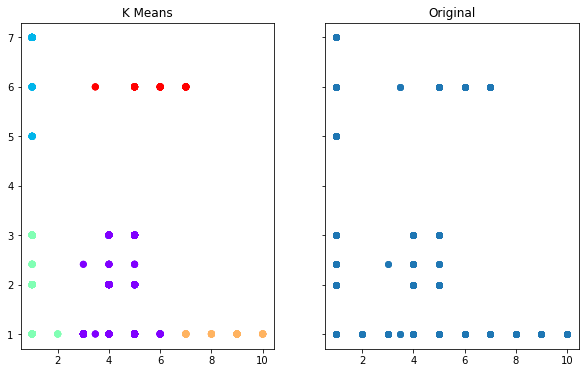

In [61]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(df_cn['cap-color-rate'],df_cn['stalk-color-above-ring-rate'],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(df_cn['cap-color-rate'],df_cn['stalk-color-above-ring-rate'],cmap='rainbow')

 

In [62]:
df_cn[df_cn['result_group']==0].describe() # group 0

,cap-color-rate,stalk-color-above-ring-rate,result_group
count,1269.000000,1269.000000,1269.0
mean,4.293462,1.702251,0.0
std,0.725583,0.816830,0.0
min,3.000000,1.000000,0.0
25%,4.000000,1.000000,0.0
50%,4.000000,1.000000,0.0
75%,5.000000,2.000000,0.0
max,6.000000,3.000000,0.0


In [63]:
df_cn[df_cn['result_group']==1].describe() # group 1

,cap-color-rate,stalk-color-above-ring-rate,result_group
count,231.0,231.000000,231.0
mean,1.0,6.761905,1.0
std,0.0,0.566855,0.0
min,1.0,5.000000,1.0
25%,1.0,7.000000,1.0
50%,1.0,7.000000,1.0
75%,1.0,7.000000,1.0
max,1.0,7.000000,1.0


In [64]:
df_cn[df_cn['result_group']==2].describe() # group 2

,cap-color-rate,stalk-color-above-ring-rate,result_group
count,444.000000,444.000000,444.0
mean,1.013514,1.856611,2.0
std,0.115590,0.833905,0.0
min,1.000000,1.000000,2.0
25%,1.000000,1.000000,2.0
50%,1.000000,2.000000,2.0
75%,1.000000,3.000000,2.0
max,2.000000,3.000000,2.0


In [65]:
df_cn[df_cn['result_group']==3].describe() # group 3

,cap-color-rate,stalk-color-above-ring-rate,result_group
count,87.000000,87.0,87.0
mean,8.471264,1.0,3.0
std,1.076591,0.0,0.0
min,7.000000,1.0,3.0
25%,7.000000,1.0,3.0
50%,9.000000,1.0,3.0
75%,9.000000,1.0,3.0
max,10.000000,1.0,3.0


In [66]:
df_cn[df_cn['result_group']==4].describe() # group 4

,cap-color-rate,stalk-color-above-ring-rate,result_group
count,73.000000,73.0,73.0
mean,5.882230,6.0,4.0
std,0.951803,0.0,0.0
min,3.467588,6.0,4.0
25%,5.000000,6.0,4.0
50%,6.000000,6.0,4.0
75%,7.000000,6.0,4.0
max,7.000000,6.0,4.0
